## Homework 3
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 05/21/2018 - 11:59p - 100 points

**Name:** `<Alma Niu>`

**Email** `<aniu@scu.edu>`

**Objectives:** 
* Make you conversant with `Multi-layer Perceptrons` (MLP)
* Implement and understand multi-class classifier using MLP
* Familiarity with `TensorFlow`

**Submission Instructions:** 
* Please download `hw3.ipynb`, `train_nn.csv`, and `test_nn.csv` files and insert cells in the `hw3.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw3`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a Neural Network based multi-class classifier using TensorFlow to categorize the flowers based on their species. 

**Guide**: Feel free to use `week6-MLP-binaryData-tf.ipynb` as a sample to kick-start your implentation. If you simply try to copy and paste the code into your homework, trust me, it won't work!!! 

Here are few things you can try:
* *One hot encoding*: There are three `species` of iris flower in your dataset. This time, you have to classify your data into `three` different categories. For that you need to compute `one hot encoding`.
* *Activation functions*: There are different activation functions used in Neural Network (NN). Your task is to research different activation functions such as SoftMax, ReLu, and Sigmoid, and learn which ones are suitable for which layers of your neural network. Based on that, design your NN architecture and check the performance by computing `accuracy`.
* *Number of hidden layers*: Instead on using one hidden layer, you can try two and check out your results and check the performance by computing `accuracy`.
* *Loss functions*: TensorFlow comes with different forms of `loss` functions. Your task is to review them and pick any two to report your findings.

**Adaptation**: We have provided you with the original dataset splitting it into two, one for training and the other for testing. You can use `train_nn.csv` to train the parameters of your model and then use `test_nn.csv` to test your model.

**Evaluation**: We have set aside another dataset similar to `test_nn.csv` which will not be disclosed to you. We will use that dataset to evaluate your algorithm. This is just to make sure that you do not have any hard-coded parameters in your code.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [35]:
# importing the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# TODO - feel free to add more as you need!
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
'Loading the train Iris dataset'
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# reading the training data into the data frame

"""Note: I mapped species' name to numbers"""

train_df = pd.read_csv('train_nn.csv', header=None, names=col_names)
train_df['species']=train_df.species.map({'Iris-virginica':0.0,'Iris-setosa':1.0,'Iris-versicolor':2.0})

# reading the test data into the data frame
test_df = pd.read_csv('test_nn.csv', header=None, names=col_names)
test_df['species']=test_df.species.map({'Iris-virginica':0.0,'Iris-setosa':1.0,'Iris-versicolor':2.0})

print(test_df)


    sepal_length  sepal_width  petal_length  petal_width  species
6            4.4          3.2           1.3          0.2      1.0
34           6.7          3.0           5.2          2.3      0.0
35           6.3          2.5           5.0          1.9      0.0
8            5.1          3.8           1.9          0.4      1.0
3            5.1          3.4           1.5          0.2      1.0
18           6.1          3.0           4.6          1.4      2.0
25           5.1          2.5           3.0          1.1      2.0
29           6.7          3.1           5.6          2.4      0.0
19           5.8          2.6           4.0          1.2      2.0
1            4.9          3.1           1.5          0.1      1.0
31           5.8          2.7           5.1          1.9      0.0
13           5.0          3.3           1.4          0.2      1.0
9            4.8          3.0           1.4          0.3      1.0
2            4.4          3.0           1.3          0.2      1.0
28        

In [37]:
'Perform One Hot Encoding for the classifier to work'
# TODO
Y_train=np.asarray(train_df.species).reshape(-1,1) #make it 2d array(reshape goes up dimension)

#print(Y_train)
encoder=OneHotEncoder(sparse=False)

Y_train=encoder.fit_transform(Y_train) #onehot for training

Y_test=np.asarray(test_df.species).reshape(-1,1)
Y_test=encoder.fit_transform(Y_test)

print(Y_test) #works!

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [39]:
'Assigning features and output columns and converting them into numpy arrays'
# this is upto you.
# you can do it in your way
# TODO (optional)

X_train=train_df.loc[:,'sepal_length':'petal_width'].as_matrix()

X_test=test_df.loc[:,'sepal_length':'petal_width'].as_matrix()
print(X_test) #convert into numpy array
#Y_train, 2d array will each array inside representing # from one hot encoding
#Y_test, same as Y_train

[[4.4 3.2 1.3 0.2]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [5.1 3.8 1.9 0.4]
 [5.1 3.4 1.5 0.2]
 [6.1 3.  4.6 1.4]
 [5.1 2.5 3.  1.1]
 [6.7 3.1 5.6 2.4]
 [5.8 2.6 4.  1.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [5.  3.3 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [4.4 3.  1.3 0.2]
 [6.9 3.1 5.4 2.1]
 [6.2 2.9 4.3 1.3]
 [5.7 2.9 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.1 2.3]
 [6.  3.  4.8 1.8]
 [6.7 3.3 5.7 2.5]
 [4.6 3.2 1.4 0.2]
 [6.8 3.2 5.9 2.3]
 [5.1 3.8 1.6 0.2]
 [6.3 2.3 4.4 1.3]
 [5.3 3.7 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [5.7 2.8 4.1 1.3]
 [6.2 3.4 5.4 2.3]
 [5.5 2.5 4.  1.3]
 [4.5 2.3 1.3 0.3]
 [6.5 3.  5.2 2. ]
 [5.  3.5 1.6 0.6]
 [5.5 2.6 4.4 1.2]
 [5.6 2.7 4.2 1.3]
 [5.9 3.  5.1 1.8]
 [5.6 3.  4.1 1.3]
 [5.  2.3 3.3 1. ]]


In [40]:
'''Function for Multilayer perceptron'''

def MLP(input_x, weights, biases): # with one hidden layer
    layer_1=tf.add(tf.matmul(input_x,weights['w_h']),bias['b_h1'])
    layer_1=tf.nn.relu(layer_1)
    out_layer=tf.add(tf.matmul(layer_1,weights['w_out']),bias['b_out'])
    out_layer=tf.nn.softmax(out_layer) #use softmax for output later
    return out_layer
# TODO
#    return out_layer

In [41]:
# Printing the dimensions of your train, and test data
# TODO
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 4)
(38, 4)
(112, 3)
(38, 3)


In [42]:
'Define the parameters for your neural network such as input_neurons, etc'
# TODO
n_features=len(X_train[0]) #4 features
input_num=len(X_train) #112 inputs for X's datapoints
num_hidden_layers=1 # go with 1 hidden layer as my base case 
num_output=len(Y_test[0])# 3 different category output

num_iter = 2000
display_step = int(num_iter / 10)
learning_rate = 0.009

In [115]:
'Initialize placeholders for the nn'
#TODO
X=tf.placeholder("float",[None,4])
Y=tf.placeholder("float",[None,3])
'weights and biases'
# TODO (You can do it in your way!)

#I assigned random weights myself
weights={
    'w_h':tf.Variable(tf.random_normal([4, 1])), #4 features, 1 hidden 
    'w_out':tf.Variable(tf.random_normal([1, 3]))#number hidden, number output
}

bias={
    'b_h1' : tf.Variable(tf.zeros([num_hidden_layers])),
    'b_out': tf.Variable(tf.zeros([num_output]))
}

In [144]:
'Defining the model'
# calling the MLP function and storing it into an appropriate variable
# TODO
model=MLP(X, weights,bias)

'Defining the cost function'
# TODO
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
'Using gradient descent optimizer for opimization'
# TODO
# You need to use gradient descent for optimization
# try with different learning rate, like 0.01, 0.002, 0.005 etc
loss_func = tf.reduce_mean(tf.square(Y - model))
optimizer = tf.train.GradientDescentOptimizer(0.0085).minimize(cost) #pass in cost as param


'Creating a session'
# TODO
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
'Set the number of epochs'
# TODO
training_epochs=2000#start minimizing errors

errors = []
iter = []
for k in range(training_epochs):
    tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={X: X_train, Y: Y_train})
    if k % display_step == 0:
        #print('output: ', sess.run(model, feed_dict={X:X_train}))
        errors.append(tmp_cost)
        iter.append(k)
        print('loss= ' + "{:.5f}".format(tmp_cost))

# separates the input space

'Initialize tensorflow variables'
# TODO

'Train your model...'
'Store the cost (or loss), so that you can use it to plot the graph'
# TODO


loss= 0.21969
loss= 0.15112
loss= 0.14018
loss= 0.13151
loss= 0.12533
loss= 0.12046
loss= 0.11631
loss= 0.11239
loss= 0.10874
loss= 0.10427


'Store the cost (or loss), so that you can use it to plot the graph'

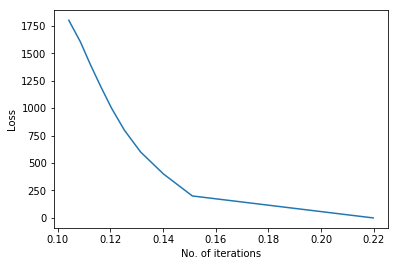

In [145]:
'Plot loss'
# TODO

# A sample code is provided below. 

plt.plot(errors,iter)
plt.xlabel("No. of iterations")
plt.ylabel("Loss")
plt.show()

In [146]:
'Print weights'
# TODO
W = np.squeeze(sess.run(weights['w_h']))   # 2x2

W2=np.squeeze(sess.run(weights['w_out']))
print(W,W2)
print('\n')
'Print biases'
# TODO
b = np.squeeze(sess.run(bias['b_h1']))    # 2,
b2=np.squeeze(sess.run(bias['b_out']))
print(b,b2)

(array([ 1.740764  , -0.22992867, -1.6974922 , -1.1819285 ], dtype=float32), array([-0.23790093,  1.9249266 ,  1.1626838 ], dtype=float32))


(array(0.05837217, dtype=float32), array([ 0.7617917 , -0.94213563,  0.18034434], dtype=float32))


In [147]:
'Test the neural network'
# Here you have to find out predicted output for every data from your test dataset
# TODO

#print y_test.shape
X_test.shape #got it, need to reshape X_test in order to work
print(Y_test.shape)

y_pred = []
for i in range(len(X_test)):
    y_pred.append(np.rint(sess.run(model, feed_dict={X:[X_test[i]]})))
    

sess.close()


(38, 3)


In [148]:
# You can print your actual y from test and predicted y using test
# you might have to check the dimensions of each to make sure you can compare them later
# TODO

print('Actual:', Y_test, 'Predicted:', y_pred)

('Actual:', array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]]), 'Predicted:', [array([[0., 1., 0.]], dtype=float32), array([[1., 0., 0.]], dtype=float32), array([[1., 0., 0.]], dtype=float32), array([[0., 1., 0.]], dtype=float32), array([[0., 1., 0.]],

In [149]:
'Compute accuracy'
# You can use sci-kit learn's accuracy score to evaluate the performance of your model on test data
# TODO
from sklearn.metrics import accuracy_score
y_pred=np.asarray(y_pred)
y_pred.shape
accuracy_score(Y_test, np.squeeze(y_pred))

0.6578947368421053